# Project 3 
The objective of this project is to perform word frequency analysis. This link provides Twitter data of Elon Musk from 2010-2022. For analysis consider the years `2017-2021` (last 5 complete years). Each year has thousands of tweets. Assume each year to be a document (all the tweets in one year will be considered as a document) 
1. Compute the term frequencies for each year. They should be normalized (scale of [0, 1]). Exclude stopwords. 
2. Show the top 10 words (for each year) by highest value of word frequency. 
3. Plot a histogram of word frequencies for each year 
4. Demonstrate Zipf’s law by plotting log-log plots of word frequencies v. rank for each year 5. Use TF-IDF to calculate and show the 5 most “important” words for each y    
https://www.kaggle.com/datasets/ayhmrba/elon-musk-tweets-2010-2021?resource=download&select=2017.csv

# Data Description
## About Dataset
Elon Musk Tweets (2010 - 2021)
All Elon Musk Twitter Tweets, from 2010 to March 22, 2021.
23/3/2021
Elon Reeve Musk FRS is a business magnate, industrial designer, and engineer. He is the founder, CEO, CTO, and chief designer of SpaceX; early investor, CEO, and product architect of Tesla, Inc.; founder of The Boring Company; co-founder of Neuralink; and co-founder and initial co-chairman of OpenAI. - Wikipedia
Although Elon joined twitter in 2009, **he didn't start tweeting until 2010 - or prior tweets were deleted-.**

## Column Descriptions:
#: Index.
            `id: ID of tweet`.
            conversation_id:: ID of twitter conversation/thread.
            created_at: Unknown, some kind of time/location index from twitter. (?)
            `date: Date of Creation`.
            timezone: Timezone.
            place: Location.
            `tweet: Contents of tweet, tweet body.`
            `language: Language of tweet.`
            hashtags: Hashtags in the tweet "#".
            cashtags: Cashtags in the tweet "$", often used for stock tweets.
            `user_id: ID of the tweet/reply author.`
            `user_id_str: User ID but in string format.`
            `username: Username of the tweet/reply author.`
            name: Name of tweet/reply author.
            day: Day of the week in which the tweet was published.
            hour: Hour of the day in which the tweet was published.
            link: Link to the tweet.
            urls: Urls present in the tweet.
            photos: Photos in the tweet (as links).
            video: videos in the tweet (Yes/No).
            thumbnail: Thumbnail for the image present in the tweet (if applicable, otherwise null).
            `retweet: Is this a retweet? (Yes/No).`
            nlikes: Number of likes on the tweet.
            nreplies: Number of replies to the tweet.
            nretweets: Number of times the tweet was retweeted.
            quote_url: Url of quoted tweet, if applicable.
            search: Unknown.
            near: Additional location info, null.
            geo: Additional location info, null.
            source: Unknown, null.
            user_rt_id: Possibly the id of the tweet author if it's a retweet, null.
            user_rt: Possibly the username of the tweet author if it's a retweet, null.
            retweet_id: Id of the retweet, null.
            reply_to: Info about the original tweet if this datapoint is a reply.
            retweet_date: Date of retweet, null.
            translate, trans_src, trans_dest Are columns that have to do with the google translate api, which was not used, therefore these columns are all null.
            translate, trans_src, trans_dest Are columns that have to do with the google translate api, which was not used, therefore these columns are all null.

Elon Musk: https://en.wikipedia.org/wiki/Elon_Musk
Twitter: https://twitter.com
Elon Musk on Twitter: https://twitter.com/elonmusk

# Pre- work

In [24]:
# import libs
# basic libs  
import pandas as pd
import numpy as np
import math
import os

# visualization libs
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import glob
from pylab import *

# models libs
import re
import nltk
from nltk.corpus import stopwords

# stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords


# process punctuation marks
import string

# avoid unness warnings
import warnings

from sklearn.preprocessing import MinMaxScaler

#! pip install WordCloud
# !pip install emoji
# !pip install spacymoji
import emoji


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/audrey/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [225]:
os.getcwd()

'/Users/audrey/Documents/0_NEU/IE6400/project3'

In [3]:
# read data from year 2017-2021
df2017 = pd.read_csv("archive/2017.csv")
df2018 = pd.read_csv("archive/2018.csv")
df2019 = pd.read_csv("archive/2019.csv")
df2020 = pd.read_csv("archive/2020.csv")
df2021 = pd.read_csv("archive/2021.csv")


# Understand and process data

In [88]:
df2017.head()

,Unnamed: 0,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,0,945814723521417217,945712432416137217,1.514335e+12,2017-12-27 00:32:57,0,NaN,@neilsiegel @Tesla Coming very soon,en,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'neilsiegel', 'name': 'Neil S...",NaN,NaN,NaN,NaN
1,1,945749747129659392,945712432416137217,1.514319e+12,2017-12-26 20:14:45,0,NaN,@Kreative Vastly better maps/nav coming soon,en,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Kreative', 'name': 'Leslie',...",NaN,NaN,NaN,NaN
2,2,945748731197980672,945712432416137217,1.514319e+12,2017-12-26 20:10:43,0,NaN,@dd_hogan Ok,und,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'dd_hogan', 'name': 'Live4EVD...",NaN,NaN,NaN,NaN
3,3,945730195113365504,945727773493968896,1.514315e+12,2017-12-26 18:57:03,0,NaN,@Jason @Tesla Sure,en,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Jason', 'name': 'jason@calac...",NaN,NaN,NaN,NaN
4,4,945729852874694656,945712432416137217,1.514315e+12,2017-12-26 18:55:42,0,NaN,"@kabirakhtar Yeah, it’s terrible. Had to upgra...",en,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'kabirakhtar', 'name': 'kabir...",NaN,NaN,NaN,NaN


In [89]:
df2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3167 entries, 0 to 3166
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       3167 non-null   int64  
 1   id               3167 non-null   int64  
 2   conversation_id  3167 non-null   int64  
 3   created_at       3167 non-null   float64
 4   date             3167 non-null   object 
 5   timezone         3167 non-null   int64  
 6   place            0 non-null      float64
 7   tweet            3167 non-null   object 
 8   language         3167 non-null   object 
 9   hashtags         3167 non-null   object 
 10  cashtags         3167 non-null   object 
 11  user_id          3167 non-null   int64  
 12  user_id_str      3167 non-null   int64  
 13  username         3167 non-null   object 
 14  name             3167 non-null   object 
 15  day              3167 non-null   int64  
 16  hour             3167 non-null   int64  
 17  link          

In [90]:
df2017.describe()

,Unnamed: 0,id,conversation_id,created_at,timezone,place,user_id,user_id_str,day,hour,...,near,geo,source,user_rt_id,user_rt,retweet_id,retweet_date,translate,trans_src,trans_dest
count,3167.000000,3.167000e+03,3.167000e+03,3.167000e+03,3167.0,0.0,3167.0,3167.0,3167.000000,3167.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,1583.000000,6.590143e+17,6.587789e+17,1.445952e+12,0.0,NaN,44196397.0,44196397.0,4.233344,12.504263,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,914.378477,2.379594e+17,2.378503e+17,5.674593e+10,0.0,NaN,0.0,0.0,1.954356,7.701672,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.543473e+10,1.543473e+10,1.275676e+12,0.0,NaN,44196397.0,44196397.0,1.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,791.500000,4.572019e+17,4.572013e+17,1.397840e+12,0.0,NaN,44196397.0,44196397.0,3.000000,5.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1583.000000,7.430977e+17,7.430971e+17,1.466003e+12,0.0,NaN,44196397.0,44196397.0,4.000000,15.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2374.500000,8.622148e+17,8.621445e+17,1.494403e+12,0.0,NaN,44196397.0,44196397.0,6.000000,19.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,3166.000000,9.458147e+17,9.457278e+17,1.514335e+12,0.0,NaN,44196397.0,44196397.0,7.000000,23.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
# understand data

# check they are all from Musk's tweeter account
# username: Username of the tweet/reply author.
print("num of username: ", len(unique(df2017["username"])), unique(df2017["username"]))
# name: Name of tweet/reply author.
print("num of name: ", len(unique(df2017["name"])), unique(df2017["name"]))


# id: ID of tweet. 
print("num of ID/tweet: ", len(unique(df2017["id"])))

num of username:  1 ['elonmusk']
num of name:  1 ['Elon Musk']
num of ID/tweet:  3167


In [314]:
# check "date", date: Date of Creation
# output shows that there are data from other years in a single year dataframe.
print("df2017:", len(df2017), unique(pd.to_datetime(df2017["date"]).dt.year))
print("df2018:", len(df2018), unique(pd.to_datetime(df2018["date"]).dt.year))
print("df2019:", len(df2019), unique(pd.to_datetime(df2019["date"]).dt.year))
print("df2020:", len(df2020), unique(pd.to_datetime(df2020["date"]).dt.year))
print("df2021:", len(df2021), unique(pd.to_datetime(df2021["date"]).dt.year))

# output tells us each file is not represent its real year data

df2017: 3167 [2010 2011 2012 2013 2014 2015 2016 2017]
df2018: 2285 [2018]
df2019: 8312 [2010 2011 2012 2013 2014 2015 2016 2017 2018 2019]
df2020: 11717 [2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
df2021: 3115 [2021]


In [4]:
# concat df and process all
df = pd.concat([df2017, df2018, df2019, df2020, df2021])

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28596 entries, 0 to 3114
Data columns (total 44 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       25481 non-null  float64
 1   id               28596 non-null  int64  
 2   conversation_id  28596 non-null  int64  
 3   created_at       28596 non-null  object 
 4   date             28596 non-null  object 
 5   timezone         28596 non-null  int64  
 6   place            0 non-null      float64
 7   tweet            28596 non-null  object 
 8   language         28596 non-null  object 
 9   hashtags         28596 non-null  object 
 10  cashtags         28596 non-null  object 
 11  user_id          28596 non-null  int64  
 12  user_id_str      25481 non-null  float64
 13  username         28596 non-null  object 
 14  name             28596 non-null  object 
 15  day              25481 non-null  float64
 16  hour             25481 non-null  float64
 17  link         

In [5]:
# convert data type
df["date"] = pd.to_datetime(df["date"])

In [6]:
# data description tells us that id is primary key for one tweet poated, so let's see this:
print("df:", len(df), len(unique(df["id"])), unique(df["date"].dt.year))

df: 28596 14832 [2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021]


In [7]:
# so we need to remove duplicates:
df = df.drop_duplicates(subset=['id'])
print("df:", len(df), len(unique(df["id"])), unique(df["date"].dt.year))

df: 14832 14832 [2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021]


In [8]:
# then we filter 5 complete years required
df = df.loc[(df["date"].dt.year >= 2017) & (df["date"].dt.year <= 2021)]
print("df:", len(df), unique(df["date"].dt.year))

df: 12826 [2017 2018 2019 2020 2021]


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12826 entries, 0 to 3114
Data columns (total 44 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0       9711 non-null   float64       
 1   id               12826 non-null  int64         
 2   conversation_id  12826 non-null  int64         
 3   created_at       12826 non-null  object        
 4   date             12826 non-null  datetime64[ns]
 5   timezone         12826 non-null  int64         
 6   place            0 non-null      float64       
 7   tweet            12826 non-null  object        
 8   language         12826 non-null  object        
 9   hashtags         12826 non-null  object        
 10  cashtags         12826 non-null  object        
 11  user_id          12826 non-null  int64         
 12  user_id_str      9711 non-null   float64       
 13  username         12826 non-null  object        
 14  name             12826 non-null  object

In [10]:
# again check they are all from Musk's tweeter account
# username: Username of the tweet/reply author.
print("num of username: ", len(unique(df2017["username"])), unique(df2017["username"]))
# name: Name of tweet/reply author.
print("num of name: ", len(unique(df2017["name"])), unique(df2017["name"]))

num of username:  1 ['elonmusk']
num of name:  1 ['Elon Musk']


In [11]:
# see what languages he used
unique(df.language)
df.groupby(["language"])["language"].agg("count").sort_values(ascending=False)

# output: "und" is "Undetermined language, in ISO 639-3 language code"
# import libs about SO 639-3 language code?

language
en     11052
und     1346
tl       132
de        41
fr        39
es        33
in        24
ru        15
pt        11
pl        11
nl        11
it        11
et        10
ca         9
tr         9
da         9
lt         7
cy         6
hi         5
no         5
ro         5
is         4
ht         4
eu         3
sl         3
hu         3
ja         3
sv         3
vi         2
lv         2
fi         2
cs         2
sr         1
el         1
uk         1
ar         1
Name: language, dtype: int64

In [12]:
# only filter Engish language
print(len(df))
df = df[df["language"]=="en"]
print(len(df))

12826
11052


In [13]:
# backup
# select certain columns
df_backup = df
df = df[['date','tweet','language','id','reply_to']]

In [14]:
# add column year
df['year'] = pd.to_datetime(df['date']).dt.year
df.head()

<ipython-input-14-ffa972bbf3f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = pd.to_datetime(df['date']).dt.year


,date,tweet,language,id,reply_to,year
0,2017-12-27 00:32:57,@neilsiegel @Tesla Coming very soon,en,945814723521417217,"[{'screen_name': 'neilsiegel', 'name': 'Neil S...",2017
1,2017-12-26 20:14:45,@Kreative Vastly better maps/nav coming soon,en,945749747129659392,"[{'screen_name': 'Kreative', 'name': 'Leslie',...",2017
3,2017-12-26 18:57:03,@Jason @Tesla Sure,en,945730195113365504,"[{'screen_name': 'Jason', 'name': 'jason@calac...",2017
4,2017-12-26 18:55:42,"@kabirakhtar Yeah, it’s terrible. Had to upgra...",en,945729852874694656,"[{'screen_name': 'kabirakhtar', 'name': 'kabir...",2017
5,2017-12-26 18:53:13,@sustainableanna @VanSeedBank Similar total si...,en,945729229001334784,"[{'screen_name': 'sustainableanna', 'name': 'A...",2017


In [15]:
df = df[['year','tweet']]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11052 entries, 0 to 3114
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    11052 non-null  int64 
 1   tweet   11052 non-null  object
dtypes: int64(1), object(1)
memory usage: 259.0+ KB


In [17]:
df.head()

,year,tweet
0,2017,@neilsiegel @Tesla Coming very soon
1,2017,@Kreative Vastly better maps/nav coming soon
3,2017,@Jason @Tesla Sure
4,2017,"@kabirakhtar Yeah, it’s terrible. Had to upgra..."
5,2017,@sustainableanna @VanSeedBank Similar total si...


In [38]:
# remove some nonsense words
def remove_at(text):
    # remove @names
    return(re.sub(r'@\S+\s', '', text))

def remove_http(text):
    # remove url
    return(re.sub(r'http\S+\s', '', text))

df['ori_tweet'] = df['tweet']
df['tweet'] = df['tweet'].apply(remove_at)
df['tweet'] = df['tweet'].apply(remove_http)
df.head()

,year,tweet,ori_tweet
0,2017,Coming very soon,Coming very soon
1,2017,Vastly better maps/nav coming soon,Vastly better maps/nav coming soon
3,2017,Sure,Sure
4,2017,"Yeah, it’s terrible. Had to upgrade old Linux ...","Yeah, it’s terrible. Had to upgrade old Linux ..."
5,2017,Similar total size. Maybe slightly bigger to a...,Similar total size. Maybe slightly bigger to a...


In [45]:
# clear http without whitespace
df['tweet'] = df['tweet'].str.replace(r'http\S*\s?', '', regex=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11052 entries, 0 to 3114
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   year       11052 non-null  int64 
 1   tweet      11052 non-null  object
 2   ori_tweet  11052 non-null  object
dtypes: int64(1), object(2)
memory usage: 345.4+ KB


# Now we **finished** data processing! And start to do TF on the processed data frame!

# 1. TF
1. Compute the term frequencies for each year. They should be **normalized** (scale of [0, 1]). **Exclude stopwords.**

In [47]:
# we think these words should be stop_words.
stop_words = set(stopwords.words('english'))
stop_words.add("it’s")
stop_words.add("would")

def compute_tf(df, year):
    # filter the dataframe to select tweets from the given year
    year_df = df[df['year'] == year]
    
    # concatenate all tweets into a single string
    tweets = ' '.join(year_df['tweet'].tolist())
    
    # split the string into words and remove stopwords
    words = [word for word in tweets.lower().split() if word not in stop_words]
    
    # Remove punctuation marks at the start and end of each string in the list
    words = [s.strip(string.punctuation) for s in words]
   
    # compute the frequency of each word
    word_freq = nltk.FreqDist(words)
    
    # normalize the frequencies to a scale of [0, 1]
    scaler = MinMaxScaler()
    tf = scaler.fit_transform([[freq] for freq in word_freq.values()])
    
    # create a new dataframe with the word and its normalized frequency
    tf_df = pd.DataFrame({'word': list(word_freq.keys()), 'tf': tf.flatten()})
    
    return tf_df

# compute the term frequency for each year in the dataframe
year = df['year'].unique()
tf_dfs = [compute_tf(df, year) for year in year]

# # print the term frequencies for each year
# for i, tf_df in enumerate(tf_dfs):
#     year = year[i]
#     print(f'Term frequencies for year {year}:')
#     print(tf_df)
#     print()

fre2017 = compute_tf(df, 2017)
fre2018 = compute_tf(df, 2018)
fre2019 = compute_tf(df, 2019)
fre2020 = compute_tf(df, 2020)
fre2021 = compute_tf(df, 2021)

print("TF 2017: ")
print(fre2017)
print('-----------------')
print("TF 2018: ")
print(fre2018)
print('-----------------')
print("TF 2019: ")
print(fre2019)
print('-----------------')
print("TF 2020: ")
print(fre2020)
print('-----------------')
print("TF 2021: ")
print(fre2021)

TF 2017: 
           word        tf
0        coming  0.297619
1          soon  0.369048
2        vastly  0.035714
3        better  0.285714
4      maps/nav  0.000000
...         ...       ...
3342     active  0.000000
3343        rev  0.000000
3344        mon  0.000000
3345  hold-down  0.000000
3346     firing  0.000000

[3347 rows x 2 columns]
-----------------
TF 2018: 
            word        tf
0         thanks  0.091954
1          tesla  0.540230
2         owners  0.021073
3          china  0.028736
4        looking  0.013410
...          ...       ...
5725  restaurant  0.000000
5726    vertical  0.000000
5727       river  0.000000
5728      sierra  0.000000
5729     roaming  0.000000

[5730 rows x 2 columns]
-----------------
TF 2019: 
             word        tf
0          pretty  0.036885
1           awful  0.004098
2             lie  0.002049
3            left  0.006148
4           south  0.002049
...           ...       ...
5448      induced  0.000000
5449   irrational  0.000

# 2. Top 10 words
2. Show the top 10 words (for each year) by highest value of word frequency. 

In [48]:
print("Top 10 TF in 2017: ")
print(fre2017.nlargest(10, 'tf'))
print('-----------------')
print("Top 10 TF in 2018: ")
print(fre2018.nlargest(10, 'tf'))
print('-----------------')
print("Top 10 TF in 2019: ")
print(fre2019.nlargest(10, 'tf'))
print('-----------------')
print("Top 10 TF in 2020: ")
print(fre2020.nlargest(10, 'tf'))
print('-----------------')
print("Top 10 TF in 2021: ")
print(fre2021.nlargest(10, 'tf'))

Top 10 TF in 2017: 
      word        tf
120    amp  1.000000
68          0.880952
108  tesla  0.809524
56   model  0.666667
65    good  0.619048
37    like  0.571429
63     one  0.535714
14   first  0.488095
52    next  0.476190
6     yeah  0.452381
-----------------
Top 10 TF in 2018: 
       word        tf
19      amp  1.000000
1     tesla  0.540230
112     car  0.224138
136       3  0.191571
204    good  0.191571
135   model  0.185824
102    like  0.176245
307       …  0.159004
71    don’t  0.139847
70   people  0.134100
-----------------
Top 10 TF in 2019: 
         word        tf
8         amp  1.000000
219     tesla  0.493852
215     great  0.196721
183  starship  0.180328
202         …  0.174180
534      like  0.174180
47       good  0.172131
59       much  0.151639
394      high  0.147541
85   probably  0.141393
-----------------
Top 10 TF in 2020: 
      word        tf
35     amp  1.000000
11   tesla  0.314685
25   great  0.218531
216   much  0.208042
50    good  0.194056
134

## Note: we don't process "…", since we think it represent something personality other than a simple punctuation.

From the top words Musk uses during the 5 years, we can see that:
1. Musk uses positive words "amp", "good", "like", "sure" and ect during these five years, which shows his positive attitude. 
2. We can also see he is always interested in "tesla". 
3. Lastly, we noticed that new top words like "time" and "work" start showing in his tweets from the year of 2021!

# 3. Histogram
3. Plot a histogram of word frequencies for each year 

## Note: since there are so many words in each year, the plot below could just shows an overview!

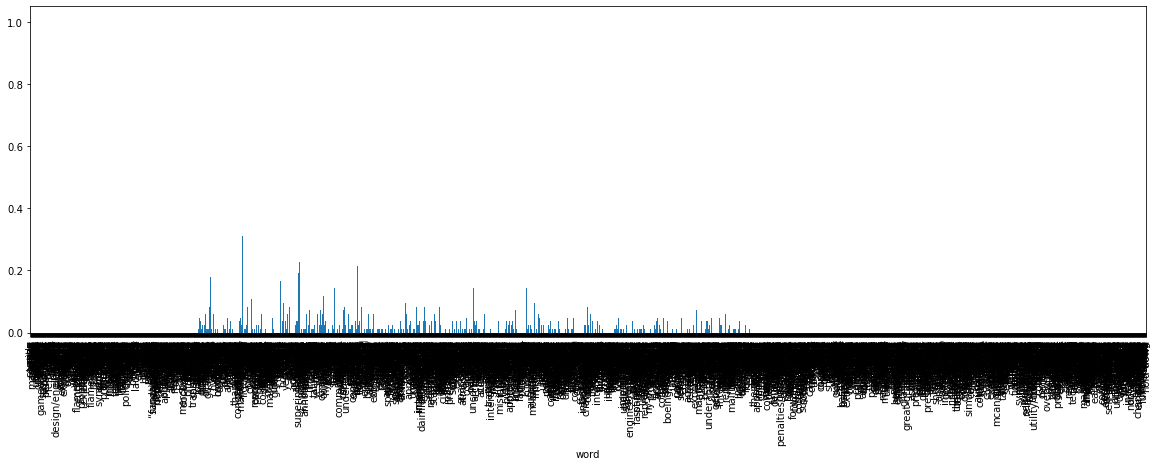

In [53]:
import warnings
warnings.filterwarnings("ignore")
fre2017.plot(x='word', y='tf', kind='bar', legend=False)
plt.gcf().set_size_inches(20, 6)
plt.show()

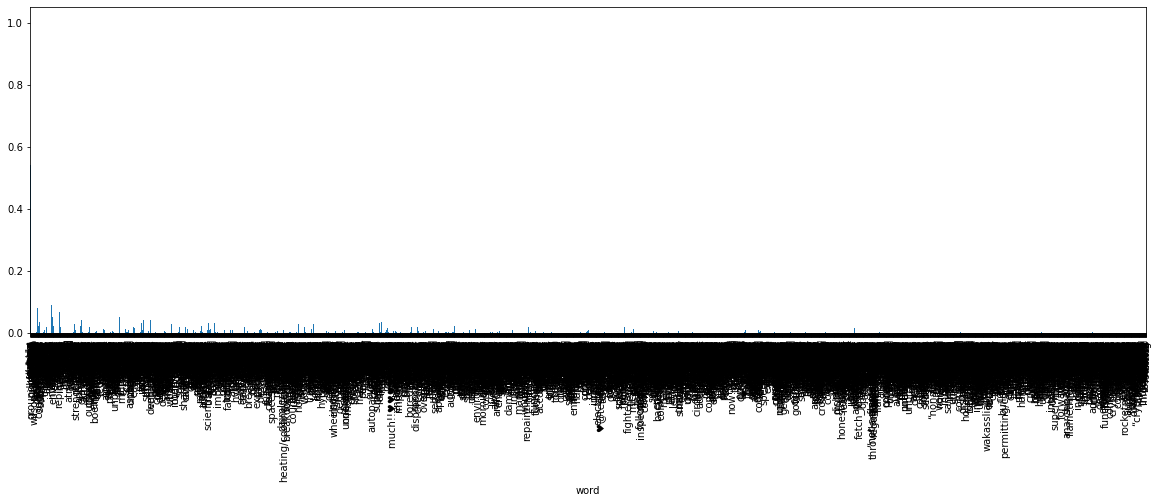

In [55]:
warnings.filterwarnings("ignore")
fre2018.plot(x='word', y='tf', kind='bar', legend=False)
plt.gcf().set_size_inches(20, 6)
plt.show()

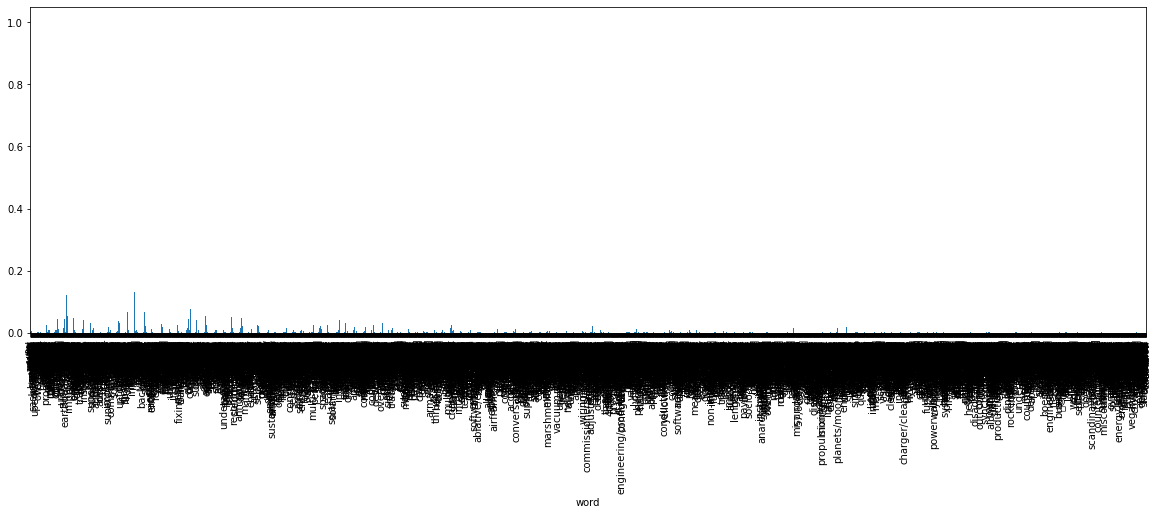

In [56]:
warnings.filterwarnings("ignore")
fre2019.plot(x='word', y='tf', kind='bar', legend=False)
plt.gcf().set_size_inches(20, 6)
plt.show()

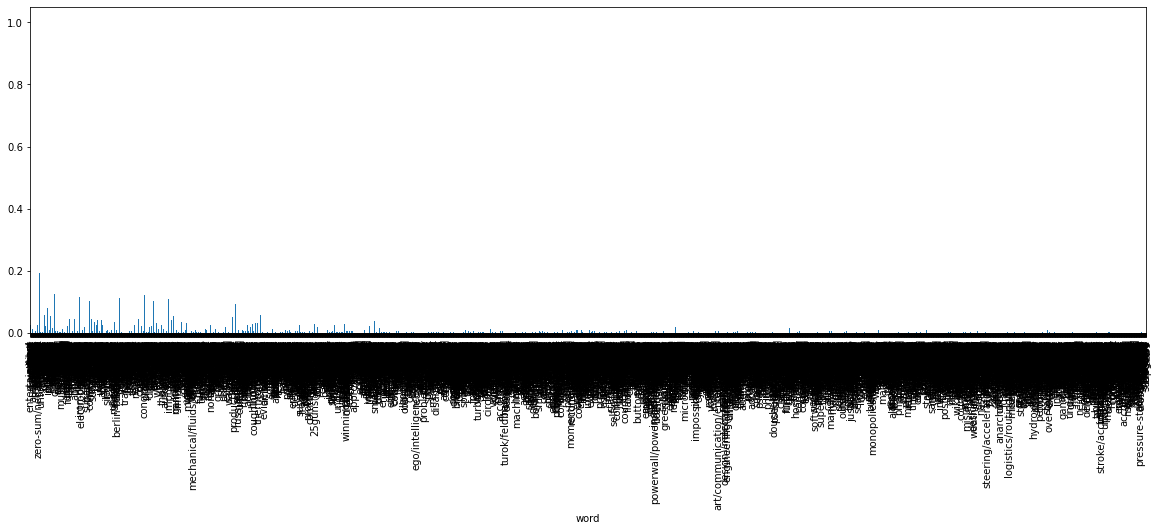

In [57]:
warnings.filterwarnings("ignore")
fre2020.plot(x='word', y='tf', kind='bar', legend=False)
plt.gcf().set_size_inches(20, 6)
plt.show()

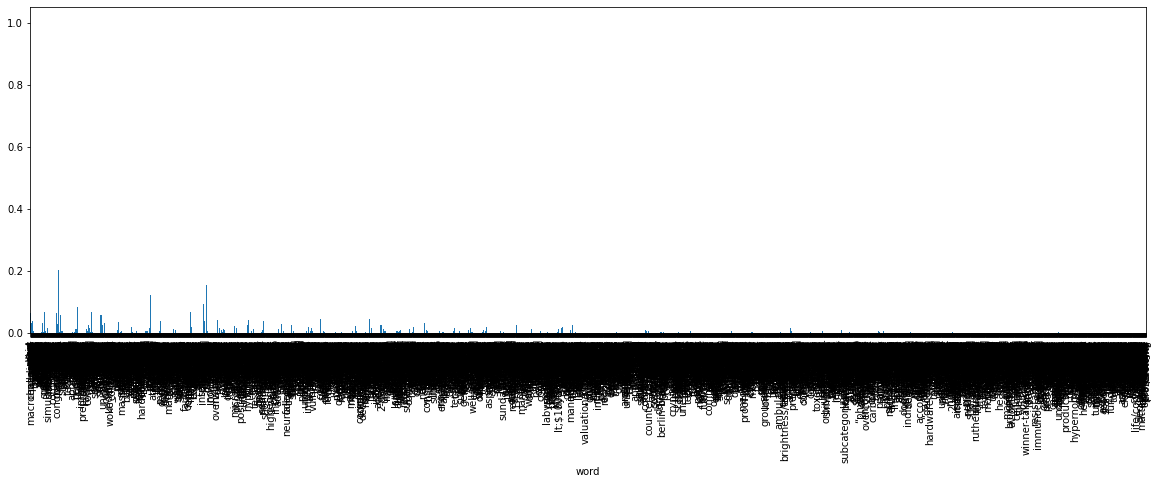

In [58]:
warnings.filterwarnings("ignore")
fre2021.plot(x='word', y='tf', kind='bar', legend=False)
plt.gcf().set_size_inches(20, 6)
plt.show()

# 4. Zipf's law
4. Demonstrate Zipf’s law by plotting log-log plots of word frequencies v. rank for each year 

In [59]:
def plot_loglog(df, year):
    # Sort data frame by tf in descending order
    df = df.sort_values(by = "tf", ascending=False)

    # Assign rank to each word
    df["rank"] = np.arange(1, len(df)+1)

    plt.loglog(df["rank"], df["tf"], marker=".", markersize=5)
    plt.plot()

    title(f"Loglog plot to demonstrate Zipf'Law of word frequencies vs rank for year: {year}")
    xlabel("Rank")
    ylabel("Frequency")
    grid(True)

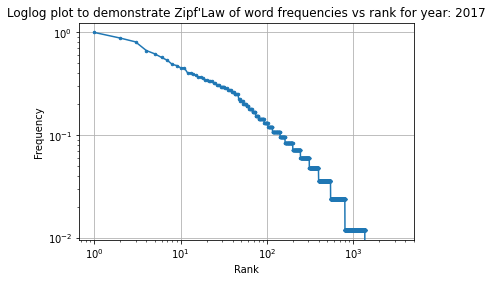

In [60]:
plot_loglog(fre2017, 2017)

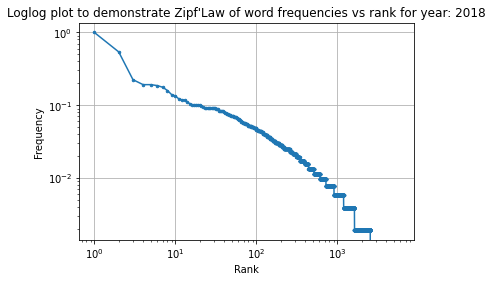

In [61]:
plot_loglog(fre2018, 2018)

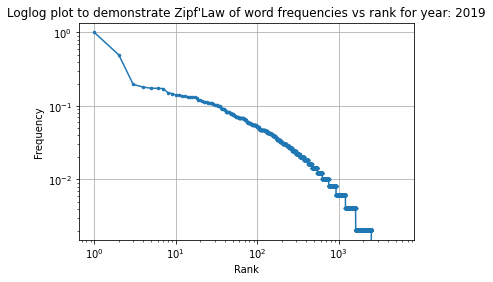

In [62]:
plot_loglog(fre2019, 2019)

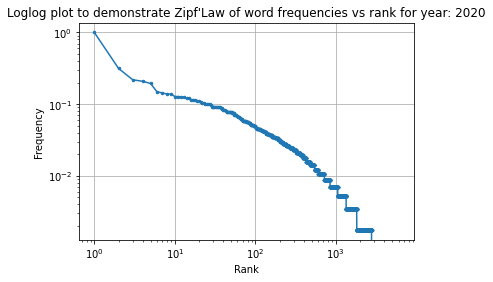

In [63]:
plot_loglog(fre2020, 2020)

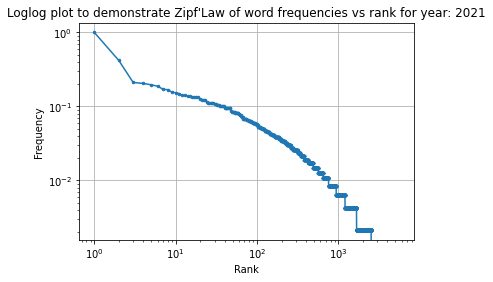

In [64]:
plot_loglog(fre2021, 2021)

## We can see from the above plots that each demonstrates Zipf'law which states word frequency is inversely proportinal to its rank.


# 5. TF-IDF
5. Use TF-IDF to calculate and show the 5 most “important” words for each year 

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
#for the sentence, make sure all words are lowercase or you will run #into error. for simplicity, I just made the same sentence all #lowercase
v2017= fre2017['word'].to_string(index=False)
v2018= fre2018['word'].to_string(index=False)
v2019= fre2019['word'].to_string(index=False)
v2020= fre2020['word'].to_string(index=False)
v2021= fre2021['word'].to_string(index=False)
#calling the TfidfVectorizer
vectorize= TfidfVectorizer(lowercase=False) # Not bothering to case fold here
#fitting the model and passing our sentences right away:
response= vectorize.fit_transform([v2017,v2018,v2019,v2020,v2021])
print(response)

  (0, 4122)	0.01161664358935184
  (0, 4944)	0.01161664358935184
  (0, 6642)	0.01966868734088083
  (0, 8642)	0.01373460813328298
  (0, 579)	0.01161664358935184
  (0, 9149)	0.01966868734088083
  (0, 10142)	0.01373460813328298
  (0, 4374)	0.01373460813328298
  (0, 8777)	0.01373460813328298
  (0, 4165)	0.01161664358935184
  (0, 254)	0.01373460813328298
  (0, 3568)	0.01161664358935184
  (0, 7239)	0.024378830989691392
  (0, 6081)	0.01161664358935184
  (0, 1813)	0.01161664358935184
  (0, 5250)	0.01161664358935184
  (0, 9556)	0.0163267872381624
  (0, 5898)	0.01161664358935184
  (0, 3480)	0.01161664358935184
  (0, 2345)	0.01161664358935184
  (0, 4210)	0.01373460813328298
  (0, 3539)	0.01373460813328298
  (0, 1983)	0.01966868734088083
  (0, 547)	0.0163267872381624
  (0, 9632)	0.01966868734088083
  :	:
  (4, 1401)	0.016485012124313744
  (4, 9414)	0.008242506062156872
  (4, 6344)	0.008242506062156872
  (4, 9364)	0.016485012124313744
  (4, 10550)	0.008242506062156872
  (4, 9314)	0.00824250606215687

In [66]:
v2017_tfidfvectorizer=response[0] # This is a sparse matrix
tfidf2017 = pd.DataFrame(v2017_tfidfvectorizer.T.todense(), index=vectorize.get_feature_names_out(), columns=["tfidf"]) 
tfidf2017.sort_values(by=["tfidf"],ascending=False).head()

,tfidf
000,0.092933
gt,0.069700
ve,0.058083
we,0.058083
dc,0.048980


In [67]:
v2018_tfidfvectorizer=response[1] # This is a sparse matrix
tfidf2018 = pd.DataFrame(v2018_tfidfvectorizer.T.todense(), index=vectorize.get_feature_names_out(), columns=["tfidf"]) 
tfidf2018.sort_values(by=["tfidf"],ascending=False).head()

,tfidf
000,0.110805
you,0.063317
non,0.063317
flamethrower,0.055619
week,0.055402


In [68]:
v2019_tfidfvectorizer=response[2] # This is a sparse matrix
tfidf2019 = pd.DataFrame(v2019_tfidfvectorizer.T.todense(), index=vectorize.get_feature_names_out(), columns=["tfidf"]) 
tfidf2019.sort_values(by=["tfidf"],ascending=False).head()

,tfidf
starship,0.059503
170,0.052809
000,0.050327
amp,0.050327
tesla,0.050327


In [69]:
v2020_tfidfvectorizer=response[3] # This is a sparse matrix
tfidf2020 = pd.DataFrame(v2020_tfidfvectorizer.T.todense(), index=vectorize.get_feature_names_out(), columns=["tfidf"]) 
tfidf2020.sort_values(by=["tfidf"],ascending=False).head()

,tfidf
gt,0.091214
covid,0.077219
high,0.076012
000,0.053208
self,0.053208


In [70]:
v2021_tfidfvectorizer=response[4] # This is a sparse matrix
tfidf2021 = pd.DataFrame(v2021_tfidfvectorizer.T.todense(), index=vectorize.get_feature_names_out(), columns=["tfidf"]) 
tfidf2021.sort_values(by=["tfidf"],ascending=False).head()

,tfidf
gt,0.107153
10,0.107153
ai,0.057698
we,0.049455
100,0.049455


## We can find something interesting of Musk from the above outputs that:
1. from 2017, he likes saying "gt", which is the concept of the GT car emerged from Europe in the mid-1900s, with the goal of being both a high-performance automobile and a long-distance driver. So GT — meaning grand tourer or gran tourer — makes sense. Some hallmarks of GT models include a near-seamless merging of luxury and performance and a 2+2 design. Which makes sense that he also likes cars since he mentions tesla often in our previous analysis.
2. in 2018, he is researching "flamethrower" which is a jet of fire(SpaceX).
3. in 2019, he likes to say "amp", "tesla" and "starship"(SpaceX).
4. in 2020, "covid", "high", and "self" becomes popular in his tweets.
5. in 2021, he likes talking about "ai"!
6. also, he is so rigorous because he likes to speak with numbers so much during five years! Since we did not process numbers, the results makes some sense!

- Overall, outputs of TF-IDF let us have a deeper insight of Musk's social media texts compared to TF!

- Note: We tried to process more and more text things in "tweet" within these few days, however, due to limited time and energy, there may still exist something more interesting that should be considered, for example, emojis! We realized how amazing people build NLP and ChatGPT!